<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/7_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 임베딩 (Embedding)
- 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화 하는 기술이다.
- 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구되고 있다.
- 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능하다.

### 인코딩 (Encoding)
- 기계는 자연어(영어, 한국어 등)을 이해할 수 없다.
- 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요한데 이러한 작업을 인코딩이라고한다.
- 텍스트 처리에서는 주로 정수 인코딩, 원-핫 인코딩을 사용한다.

### 정수 인코딩
- dictionary를 이용한 정수 인코딩: 각 단어와 정수 인덱스를 연결하고 토큰을 변환해주는 방법

In [68]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique)

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i

encode = [token2idx[x] for x in tokens]

print(tokens)
print(token2idx)
print(encode)

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라.']
{'오늘을': 0, '평생': 1, '죽을': 2, '살아라.': 3, '꾸어라.': 4, '내일': 5, '그리고': 6, '살': 7, '꿈을': 8, '것처럼': 9}
[1, 7, 9, 8, 4, 6, 5, 2, 9, 0, 3]


### keras를 이용한 정수 인코딩
- 정수 인코딩은 단어에 정수로 레이블을 부여한다.
- `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트ㅡ 처리에 필요한 도구들을 지원한다.
- 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게 설정한다.

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라."

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


### 원-핫 인코딩
- 원-핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
- 원-핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가지는 위치는 1, 나머지는 0을 가진 벡터로 변환

In [70]:
import numpy as np
import pandas as pd


one_hot = []

for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] -1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)

print(np.array(one_hot).shape)
pd.DataFrame(data=np.array(one_hot), columns=t.word_index.keys())

(11, 10)


,것처럼,평생,살,꿈을,꾸어라,그리고,내일,죽을,오늘을,살아라
0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0


### keras를 이용한 원-핫 인코딩
- `keras`에서는 정수 인코딩을 원-핫 인코딩으로 간단하게 변환해주는 `to_categorical` 메소드를 제공한다.

In [71]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### IMDB 데이터
- 영화 데이터베이스
- 양근단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련 데이터셋: 25,000개
  - 테스트데이터: 25,000개

In [72]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [73]:
num_words = 1000
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [74]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


- 긍정: 1
- 부정: 0

In [75]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [76]:
word_index = imdb.get_word_index()
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [77]:
for i in range(10):
    if y_train[i] == 0:
        label = '부정'
    else:
        label = '긍정'

    decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[i])
    print("{}\n{}".format(decoded_sequence, label))

the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wit

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기
  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름
    - 데이터가 길면 padding 설정
      - `pre`: 데이터 앞에 0으로 채움
      - `post`: 데이터 뒤에 0으로 채움
- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding`레이어를 사용할 수 있음

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [79]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
100


In [80]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

### 모델 구성

In [81]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3201      
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [83]:
history = model.fit(pad_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7078 - val_loss: 0.4288 - val_accuracy: 0.8042
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8327 - val_loss: 0.4088 - val_accuracy: 0.8126
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8553 - val_loss: 0.3831 - val_accuracy: 0.8276
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3080 - accuracy: 0.8704 - val_loss: 0.3911 - val_accuracy: 0.8230
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.8866 - val_loss: 0.3990 - val_accuracy: 0.8228
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2454 - accuracy: 0.9042 - val_loss: 0.4156 - val_accuracy: 0.8136
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2122 - accuracy: 0.9247 - val_loss: 0.4313 - val_accuracy: 0.8086
Epoch 

### 시각화

In [84]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [85]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

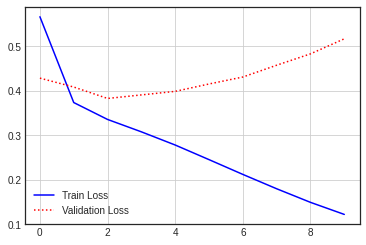

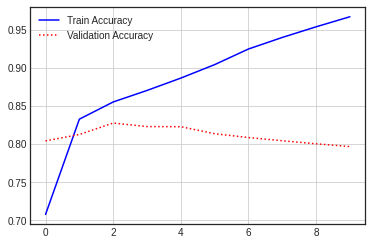

In [86]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [87]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4882 - accuracy: 0.8055


[0.48816266655921936, 0.8054800033569336]

### 단어의 수를 늘린 후 재학습

In [88]:
num_words=2000
max_len=400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### 데이터 확인

In [89]:
# print(x_train[0])
# print(pad_x_train[0])

In [90]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 32)           64000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 12801     
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [92]:
history = model.fit(pad_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.4993 - accuracy: 0.7509 - val_loss: 0.3298 - val_accuracy: 0.8676
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2798 - accuracy: 0.8859 - val_loss: 0.2972 - val_accuracy: 0.8802
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2301 - accuracy: 0.9082 - val_loss: 0.3146 - val_accuracy: 0.8792
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1868 - accuracy: 0.9298 - val_loss: 0.3135 - val_accuracy: 0.8762
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1464 - accuracy: 0.9496 - val_loss: 0.3362 - val_accuracy: 0.8696
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1092 - accuracy: 0.9660 - val_loss: 0.3473 - val_accuracy: 0.8714
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0782 - accuracy: 0.9783 - val_loss: 0.3742 - val_accuracy: 0.8680
Epoch 

In [93]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

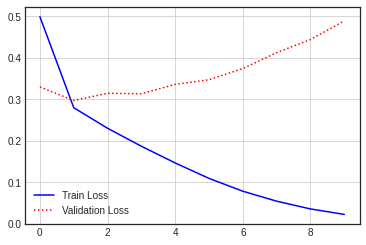

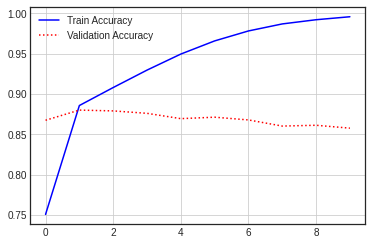

In [94]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

In [95]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4950 - accuracy: 0.8490


[0.49499812722206116, 0.8490399718284607]

- 위 결과도 나쁘지 않으나 과적합이 되는 이유
  - 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음
  - 시퀀스 전체를 고려한 특성을 학습하는것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋다.

### Word2Vec
- 2013년, `Mikolov`와 동료들이 제안한 모형이다.
- 분류등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능
- Word2Vec의 방식
  - 주변 단어의 관례를 이용
    - CBOW (Continuous bag-of-words)
      - 주변 단어의 임베딩을 더해서 대상 단어를 예측
    - Skip-Gram
      - 대상 단어의 임베딩으로 주변 단어를 예측
      - 일반적으로 CBOW보다 성능이 좋은 편
      - 한번에 여러 단어를 예측해야하기 때문에 비효율적이나 최근에는 **Negative sampling**이라는 방법으로 개선

<img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

In [96]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

print(len(documents))
documents[2]

11314


"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [97]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
import pandas as pd

news_df = pd.DataFrame({'article': documents})
len(news_df)

11314

In [99]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
len(news_df)

11096

In [100]:
news_df['article'] = news_df['article'].apply(clean_text)

In [101]:
news_df['article'] = news_df['article'].apply(clean_stopword)

In [102]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [103]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10991


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


- CBOW

In [104]:
from gensim.models import Word2Vec

# CBOW - sg(skip gram)값을 0으로 설정
model = Word2Vec(sentences=news_texts, window=3, size=100, min_count=5, workers=4, sg=0)

In [105]:
model.wv.similarity('man', 'woman')

0.8589254

In [106]:
model.most_similar(positive=['soldiers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('turks', 0.9678522944450378),
 ('land', 0.9676439762115479),
 ('genocide', 0.9653445482254028),
 ('killed', 0.9605569839477539),
 ('villages', 0.9593665599822998),
 ('began', 0.9547222256660461),
 ('troops', 0.9509955644607544),
 ('murdered', 0.9440058469772339),
 ('civilians', 0.9438657760620117),
 ('arabs', 0.9430141448974609)]

In [107]:
model.most_similar(positive=['man', 'soldiers'], negative=['woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('war', 0.9359641671180725),
 ('attack', 0.9351508021354675),
 ('men', 0.925081729888916),
 ('murders', 0.9052090644836426),
 ('jew', 0.9032260775566101),
 ('jerusalem', 0.9027950763702393),
 ('bosnia', 0.8991117477416992),
 ('dignity', 0.8968210816383362),
 ('promised', 0.8966580629348755),
 ('friendship', 0.8940413594245911)]

- Skip gram

In [108]:
from gensim.models import Word2Vec

# Skip gram
model = Word2Vec(sentences=news_texts, window=3, size=100, min_count=5, workers=4, sg=1)

In [109]:
model.wv.similarity('man', 'woman')

0.83293617

In [110]:
model.most_similar(positive=['soldiers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wounded', 0.9207339286804199),
 ('villages', 0.9182985424995422),
 ('troops', 0.9119439125061035),
 ('turks', 0.9112537503242493),
 ('azerbaijanis', 0.904045820236206),
 ('greeks', 0.9020031690597534),
 ('kurds', 0.9009740948677063),
 ('azeri', 0.9008885025978088),
 ('murdered', 0.8978092074394226),
 ('attacked', 0.8954031467437744)]

In [111]:
model.most_similar(positive=['man', 'soldiers'], negative=['woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('murders', 0.8464395999908447),
 ('murder', 0.8389997482299805),
 ('babies', 0.8375294208526611),
 ('israelis', 0.8312669992446899),
 ('fighters', 0.8248286843299866),
 ('jew', 0.8233842849731445),
 ('greeks', 0.8196418285369873),
 ('wars', 0.8187225461006165),
 ('rape', 0.8137237429618835),
 ('alike', 0.8123501539230347)]

- 시각화

In [112]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('news_w2v')

- metadata.tsv와 tensor.tsv 데이터 생성

In [113]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2021-08-13 14:42:12,154 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2021-08-13 14:42:12,155 - utils_any2vec - INFO - loading projection weights from news_w2v
2021-08-13 14:42:14,419 - utils_any2vec - INFO - loaded (22174, 100) matrix from news_w2v
2021-08-13 14:42:16,303 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2021-08-13 14:42:16,303 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2021-08-13 14:42:16,306 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [114]:
!ls

news_w2v  news_w2v_metadata.tsv  news_w2v_tensor.tsv  sample_data


In [115]:
from google.colab import files

files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Embedding Projector: https://projector.tensorflow.org/

### T-SNE
- T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘이다.
- 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 T-SNE 알고리즘을 많이 이용한다.
- T-SNE는 가장 먼저 원 공간의 데이터 유사도 $P_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의한다.
- $x_{i}$에서 $x_{j}$간의 유사도 $P_{j|i}$는 다음과 같이 정의할 수 있다.
$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$
- $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 **Negative exponential**을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가진다.

- 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의할 수 있다.

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

- $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의한다.

- T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있다.